### 5.1 

In [1]:
#%pip install gym 

import gym 
import random 
import numpy as np

env = gym.make("FrozenLake-v1", is_slippery = False, render_mode = "ansi")



In [7]:
print(dir(env))
print(env.__dict__)


['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_action_space', '_elapsed_steps', '_is_protocol', '_max_episode_steps', '_metadata', '_np_random', '_observation_space', '_reward_range', 'action_space', 'class_name', 'close', 'env', 'metadata', 'np_random', 'observation_space', 'render', 'render_mode', 'reset', 'reward_range', 'spec', 'step', 'unwrapped']
{'env': <OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>, '_action_space': None, '_observation_space': None, '_reward_range': None, '_metadata': None, '_max_episode_steps': 100, '_ela

In [11]:
env.reset()

(0, {'prob': 1})

In [16]:
nb_states = env.observation_space.n
nb_actions = env.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print("Q-table:")
print(qtable)

action = env.action_space.sample()
"sol: 0"
"asagi: 1"
"sag: 2"
"yukarı: 3"

new_state, reward, done, _, info = env.step(action)

Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### 5.2

In [1]:
import gym 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery = False, render_mode = "ansi")
nb_states = env.observation_space.n
nb_actions = env.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print("Q-table:")
print(qtable) # ajanın beyni

Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


100%|██████████| 1000/1000 [00:00<00:00, 7110.64it/s]


Qtable After Traning:
[[0.         0.59049    0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.6561     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.729      0.        ]
 [0.         0.81       0.         0.        ]
 [0.11390625 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.9        0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


<BarContainer object of 1000 artists>

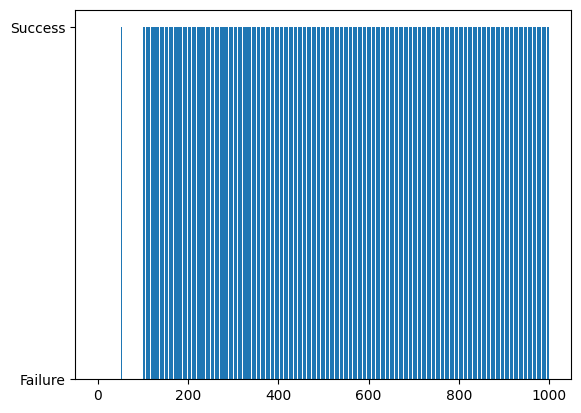

In [6]:
episodes = 1000 #episode
alpha = 0.5 #learning rate
gamma = 0.9 #discount rate
outcomes = []

#training
for _ in tqdm(range(episodes)):
    state, _ = env.reset()
    done = False # ajanın bsari durumu 
    outcomes.append("Failure")

    while not done: # ajan basarili olana kdar state icerinde hareket et (action ve uygula)

        # aciton 
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = env.action_space.sample()

        new_state, reward, done, _, _ = env.step(action)

        #update q table 
        new_state = int(new_state)  # Eğer new_state bir array ise, int'e çevir
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])


        state = new_state

        if reward:
            outcomes[-1] = "Success"
        
print("Qtable After Traning:")
print (qtable)

plt.bar(range(episodes),outcomes)

In [7]:
# test 
episodes = 100
nb_success = 0
for _ in tqdm(range(episodes)):
    state , _ = env.reset()
    done = False

    while not done:
        if np.max(qtable[state]) > 0 :
            action = np.argmax(qtable[state])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, _, _ = env.step(action)

        state = new_state
        nb_success += reward 
print("Success rate: ", 100*nb_success/episodes)

100%|██████████| 100/100 [00:00<00:00, 9089.40it/s]

Success rate:  100.0
